In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### a) 
Load the iris data set and count how many data points belong to each Iris species.

In [2]:
# load the iris data set
data = pd.read_csv('data/iris.data.txt', names = ['sl','sw','pl','pw','iris_type'])
target = np.array(data.iris_type)
target[data.iris_type == "Iris-setosa"] = 0
target[data.iris_type == "Iris-versicolor"] = 1
target[data.iris_type == "Iris-virginica"] = 2

In [3]:
# count how many data points belong to each species
count_setosa = len(data[data.iris_type == "Iris-setosa"])
count_versicolor = len(data[data.iris_type == "Iris-versicolor"])
count_virginica = len(data[data.iris_type == "Iris-virginica"])

print("# of data points:")
print("Iris-setosa:     ", count_setosa)
print("Iris-versicolor: ", count_versicolor)
print("Iris-virginica:  ", count_virginica)

# of data points:
Iris-setosa:      50
Iris-versicolor:  50
Iris-virginica:   50


### b)
Visualize the data: Produce a scatter plot of two arbitrary features. Use colors to show class membership.

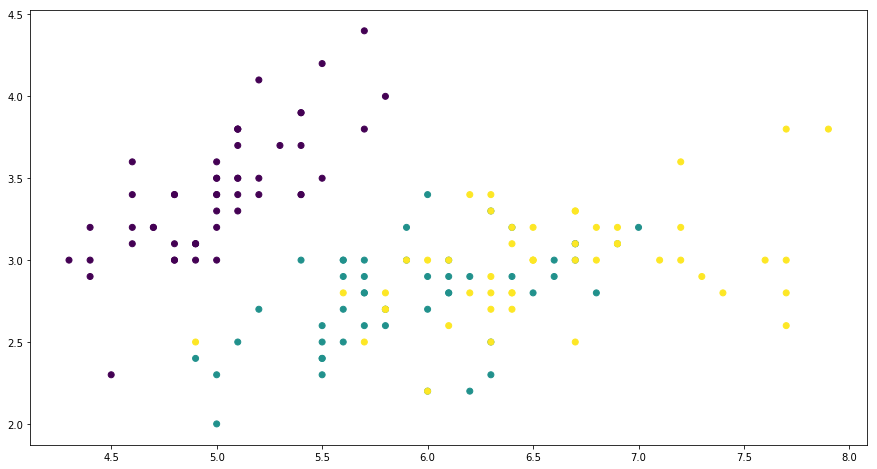

In [4]:
# scatter plot of sl and sw
plt.figure(figsize=(15,8))
x = data.sl
y = data.sw
plt.scatter(x, y, c = target)

### c)
From the data estimate the probability of having an Iris of type setosa given that you see a sepal length > 5cm?

In [5]:
n = len(target)

# P(sl > 5)
p_sl = len(data[data.sl > 5])/n

# P(iris_type = "setosa", sl > 5)
p_joint = len(data[(data.iris_type == "Iris-setosa") & (data.sl >5)])/n

# P(iris_type = "setosa"| sl > 5)
p_cond = p_joint/p_sl

print("P(sl > 5):                      ", p_sl)
print("P(iris_type = 'setosa', sl > 5):", p_joint)
print("P(iris_type = 'setosa'| sl > 5):", p_cond)

P(sl > 5):                       0.7866666666666666
P(iris_type = 'setosa', sl > 5): 0.14666666666666667
P(iris_type = 'setosa'| sl > 5): 0.1864406779661017


### d)
For the following task only consider the features sepal length and petal length of class Iris setosa. Assume that the data comes from a multivariate normal distribution. Calculate the following estimates for the parameters of the distribution:

$$ \hat{\mu} = \frac{1}{N}\sum_{i=1}^N x_i \qquad \hat{\Sigma} = \frac{1}{N-1}\sum_{i=1}^N \left( x_i - \hat{\mu} \right)^T \left( x_i - \hat{\mu}\right)$$

In [6]:
X  = data[data.iris_type == "Iris-setosa"]
X = np.array(X)
X = X[:,(1,3)]

n = len(X)

# mean
mean = np.mean(X, axis=0)

# covariance
diff = X - mean
cov = 1/(n-1) * np.dot(diff.T ,diff)

print("mean: ")
print(mean)
print("covariance matrix: ")
print(cov)

mean: 
[3.4180000000000006 0.2439999999999999]
covariance matrix: 
[[0.14517959183673468 0.011436734693877543]
 [0.011436734693877543 0.011493877551020404]]
